In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

if __name__ == '__main__':
    raw_dataset = datasets.load_wine()
    #print(raw_dataset.keys())
    
    dataframe = pd.DataFrame(raw_dataset['data'], columns=raw_dataset['feature_names'])
    print(dataframe.describe())
    print('\nEsempi dataframe:\n',dataframe.head(6))

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [15]:
print(dataframe.dtypes)
print(dataframe.isna().sum())

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


Text(0.5, 1.0, 'Matrice di correlazione degli attributi')

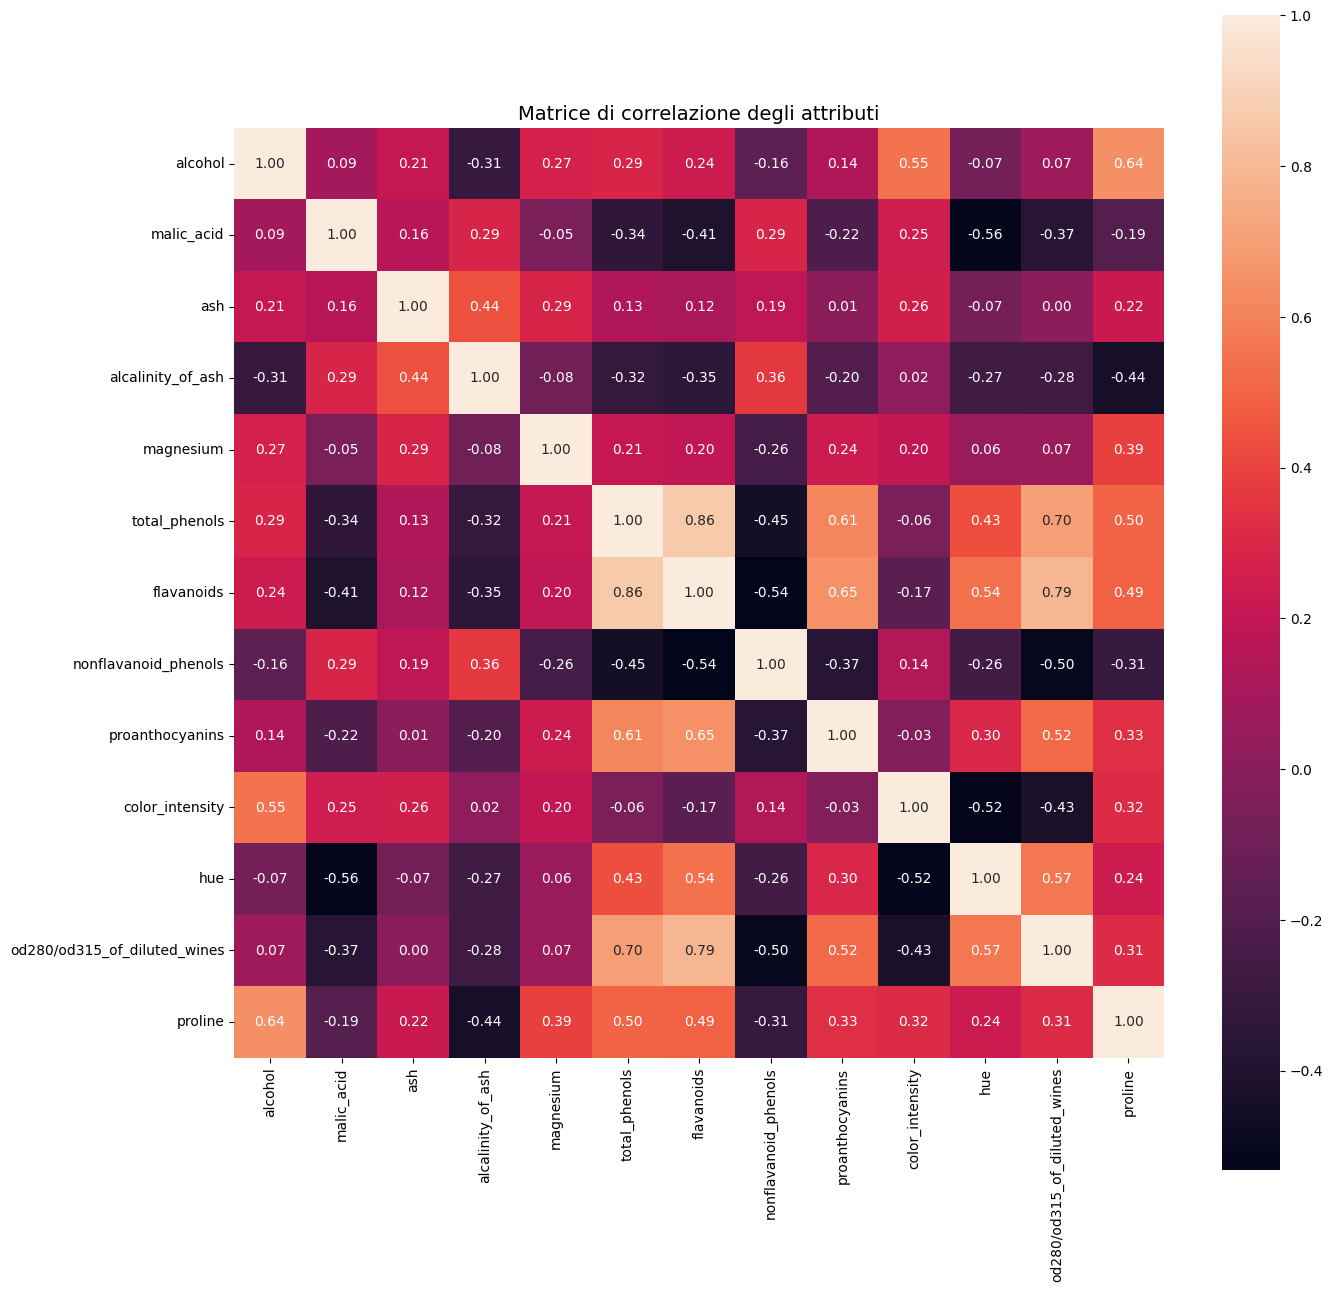

In [16]:
#Calcolo matrice di correlazione tra le features
corr_matrix = dataframe.corr()
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax = 1, square=True, annot=True, fmt='.2f', robust=True)
plt.title('Matrice di correlazione degli attributi', fontsize=14)

#La cosa che ci interessa è che ci sia correlazione , indipendentemente se positiva o negativa

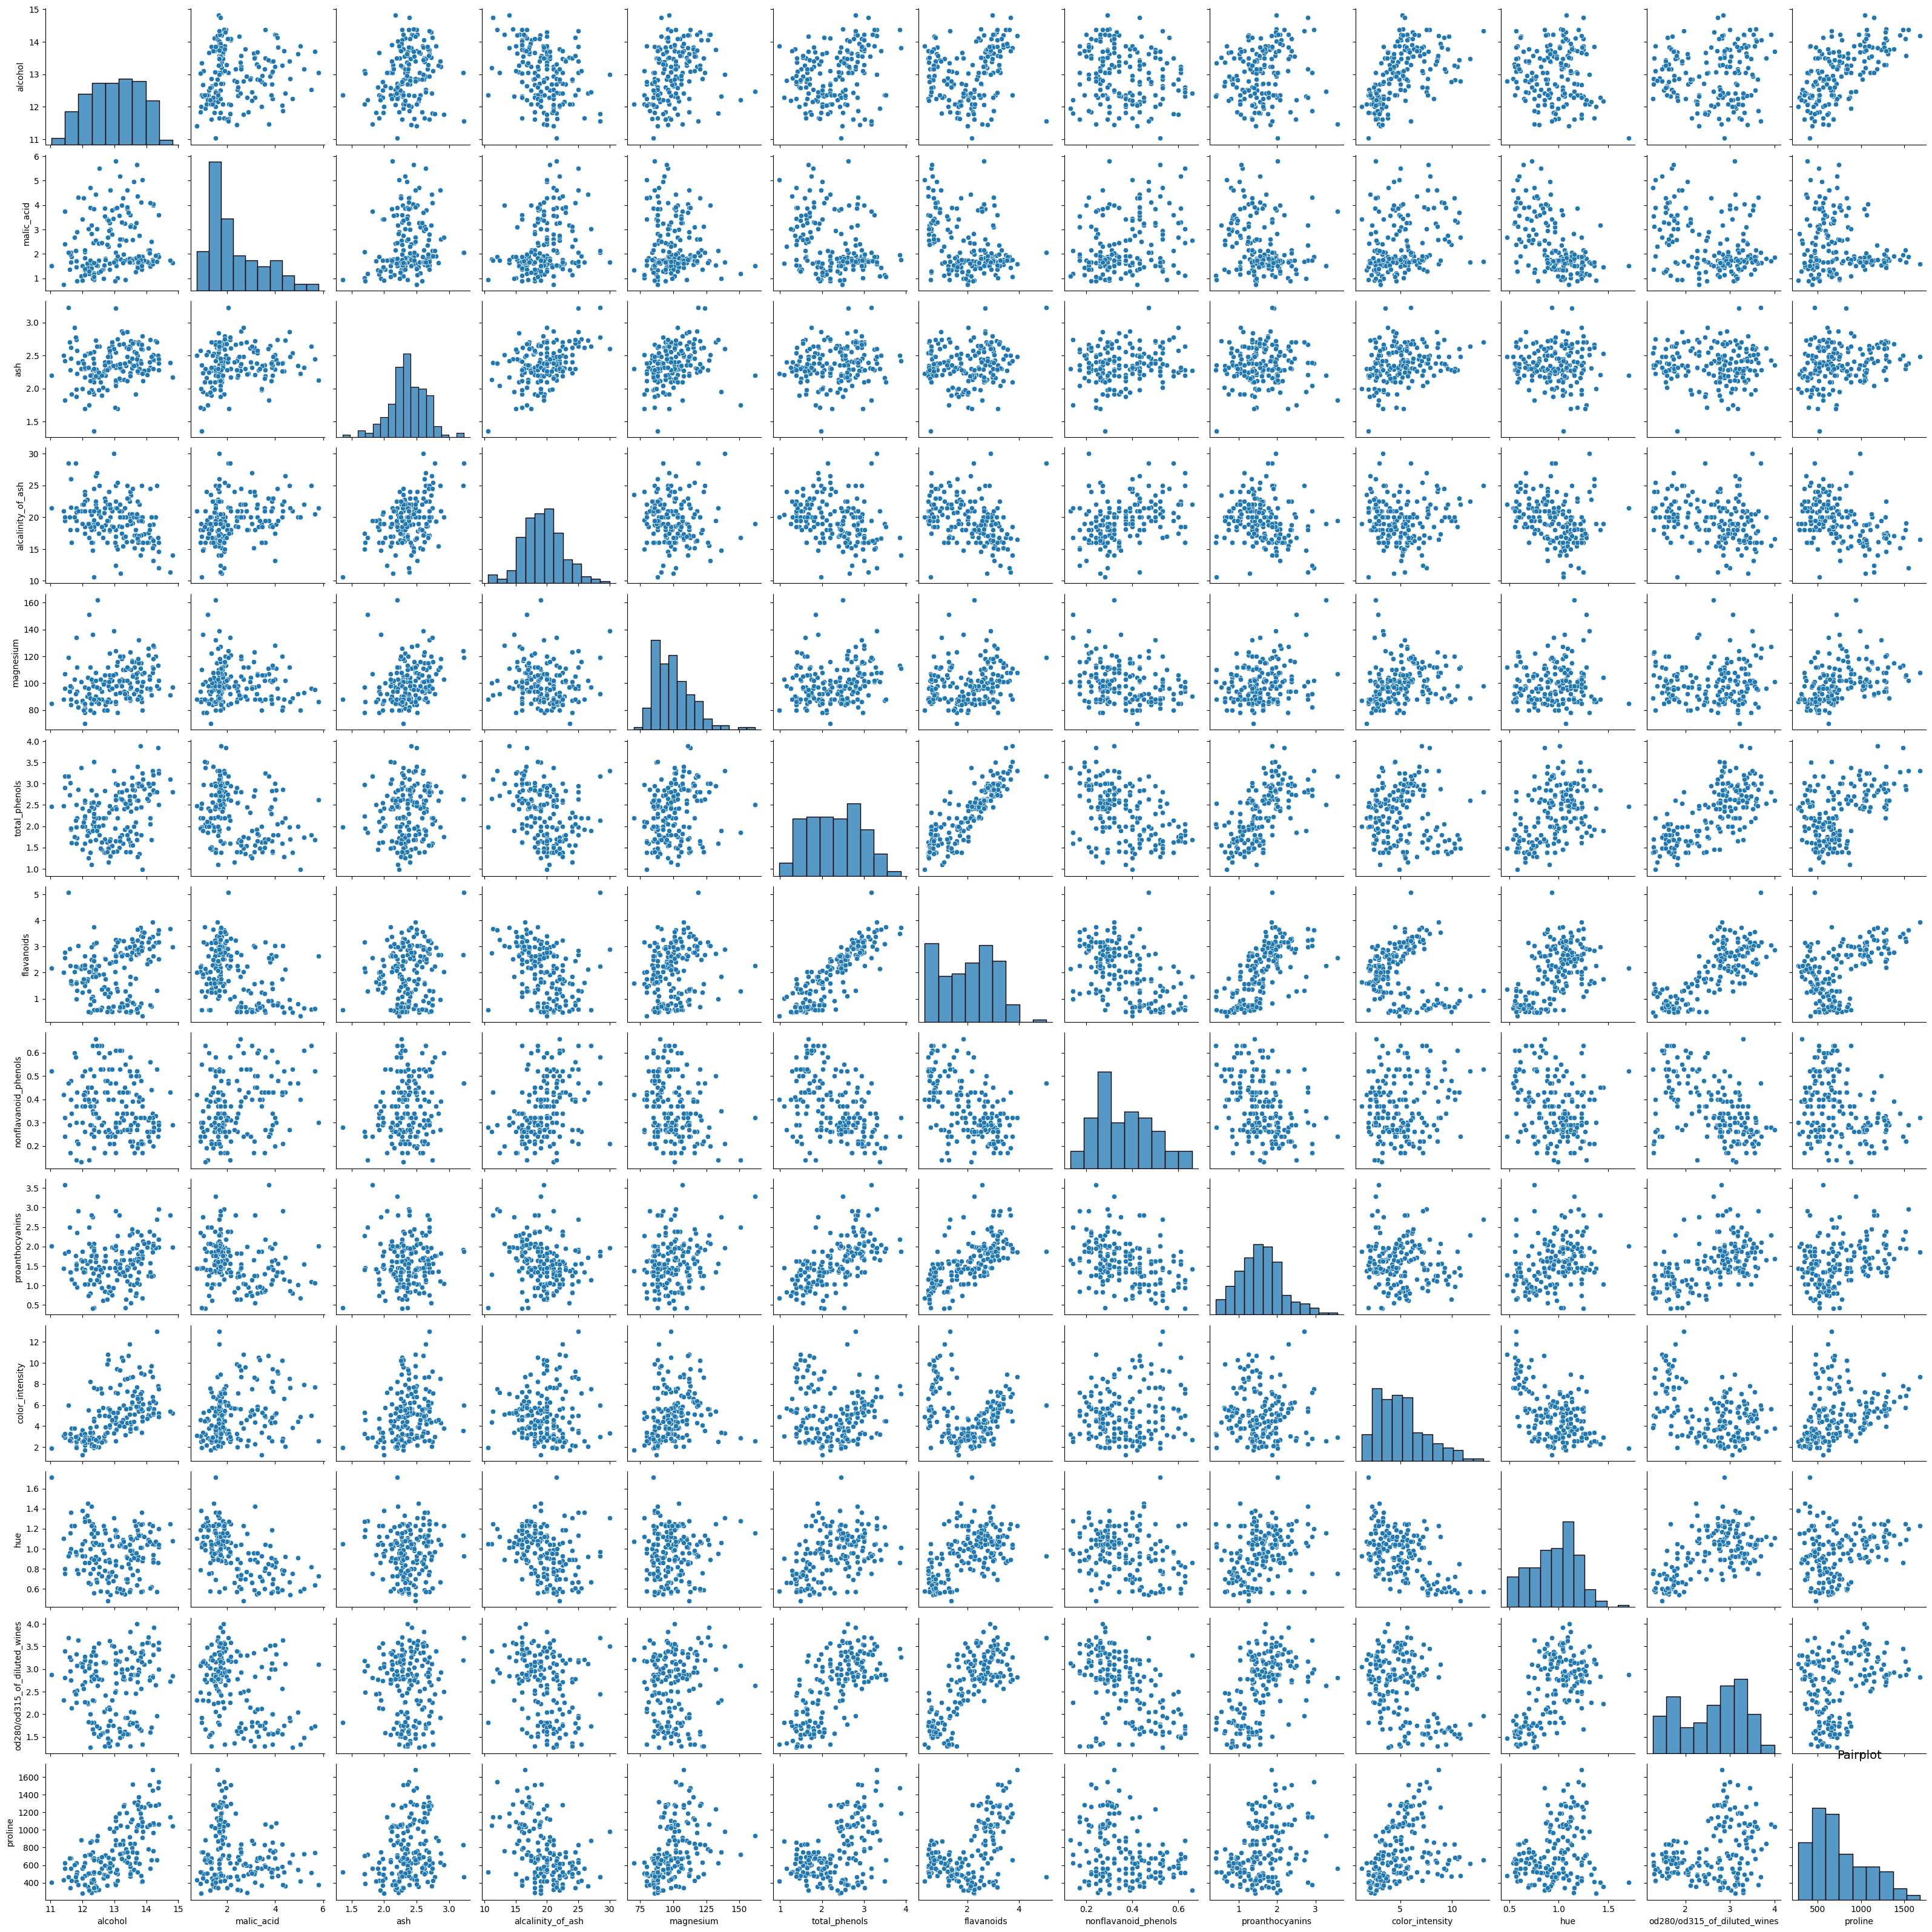

In [17]:
#Andiamo a vedere il pairplot : correlazione singolare tra attributo e attributo
sns.pairplot(dataframe)
plt.title('Pairplot', fontsize=14)
plt.show()

In [18]:
#Andiamo a capire se , a coppie diverse , abbiamo un tipo di correlazione simile

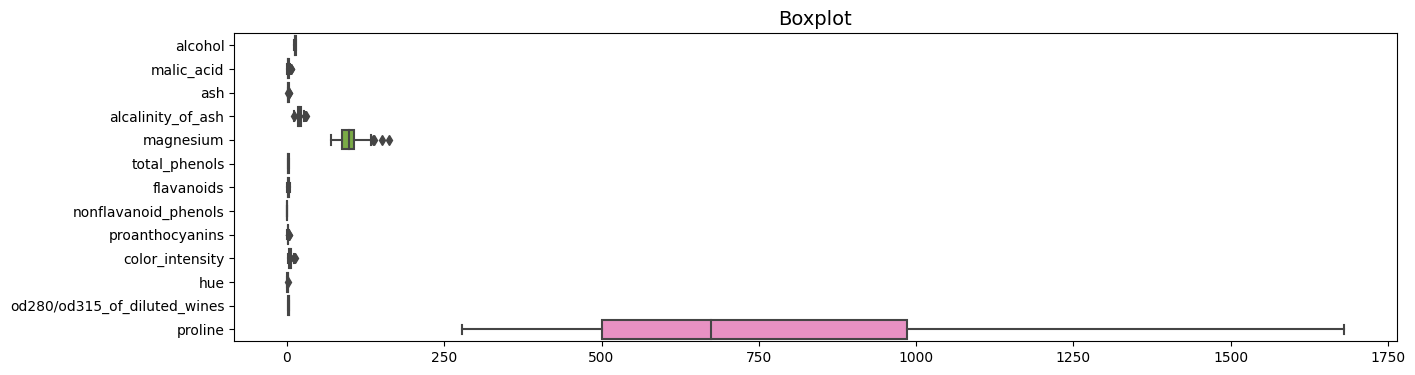

In [19]:
#Ora facciamo il boxplot per capire il range di variabilità tra gli attributi
plt.figure(figsize=(15, 4))
sns.boxplot(data=dataframe, orient='h')
plt.title('Boxplot', fontsize=14)
plt.show()

In [20]:
#Come risolvere questo problema di range di variabilità diversa tra gli attributi. Andiamo
#a normalizzare con Scaler
scaler = StandardScaler()
scaler_array = scaler.fit_transform(dataframe) #prima si addestra su tutto il ds e poi applica modifica su tutto df
scaler_dataframe = pd.DataFrame(scaler_array, columns=dataframe.columns)

print('PRIMA:\n',dataframe.describe())
print('\nDOPO:\n',scaler_dataframe.describe())


PRIMA:
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min    

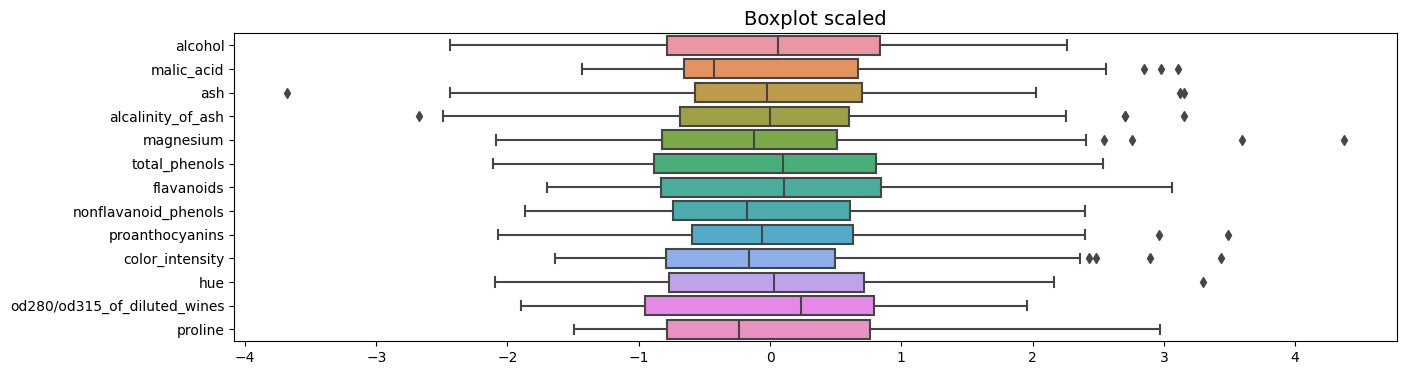

In [21]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=scaler_dataframe, orient='h')
plt.title('Boxplot scaled', fontsize=14)
plt.show()

In [23]:
#Implementiamo il modello kmeans
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(scaler_dataframe)
centroids = kmeans_model.cluster_centers_
print('\ncentroids\n', centroids)
print('\nshape\n', kmeans_model.cluster_centers_.shape)
print('\nlabel\n', kmeans_model.labels_)
      
scaler_dataframe["cluster"] = kmeans_model.labels_
#Ogni centroide ha 13 coordinate, una posizione in uno spazio a 13 dimensioni
#


centroids
 [[-0.87359036 -0.56122973 -0.75073571  0.03700652 -0.73664839 -0.43171706
  -0.23519895  0.27440986 -0.43561393 -0.88977635  0.55522018  0.09905855
  -0.77016282]
 [ 0.88287704 -0.39618212  0.15705503 -0.81287531  0.59437864  0.83496622
   0.92178615 -0.62483119  0.63280038  0.18563806  0.49984894  0.73525556
   1.20226668]
 [-0.81146319  0.12329887  0.43377321  0.62655595  0.01554453  0.70395566
   0.64661849 -0.40589144  0.71093931 -0.74271348  0.18343385  0.62118683
  -0.63785622]
 [ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461]]

shape
 (4, 13)

label
 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 2 0 0 0 1 0 2 0 2
 2 0 0 0 1 2 0 0 0 3 2 0 0 0 0 0 0 0 0 2 2 1 2 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 

C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='total_phenols', ylabel='flavanoids'>

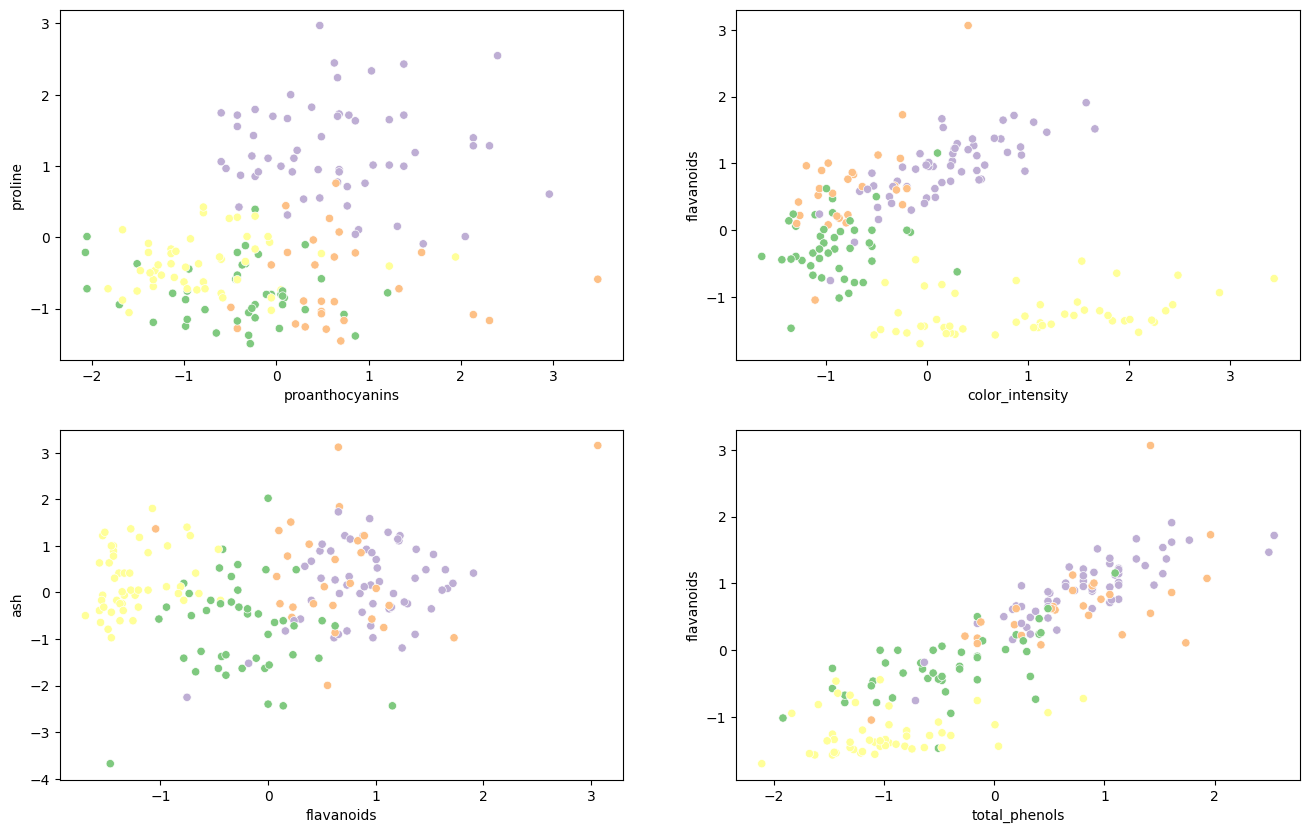

In [24]:
#Andiamo a costruire dei plot con numero di variabili inferiore per individuare meglio
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,10))

sns.scatterplot(x="proanthocyanins", y="proline",data=scaler_dataframe, hue="cluster", palette="Accent",ax=ax1,legend=False)

sns.scatterplot(x="color_intensity", y="flavanoids",data=scaler_dataframe, hue="cluster", palette="Accent",ax=ax2,legend=False)

sns.scatterplot(x="flavanoids", y="ash",data=scaler_dataframe, hue="cluster", palette="Accent",ax=ax3,legend=False)

sns.scatterplot(x="total_phenols", y="flavanoids",data=scaler_dataframe, hue="cluster", palette="Accent",ax=ax4,legend=False)

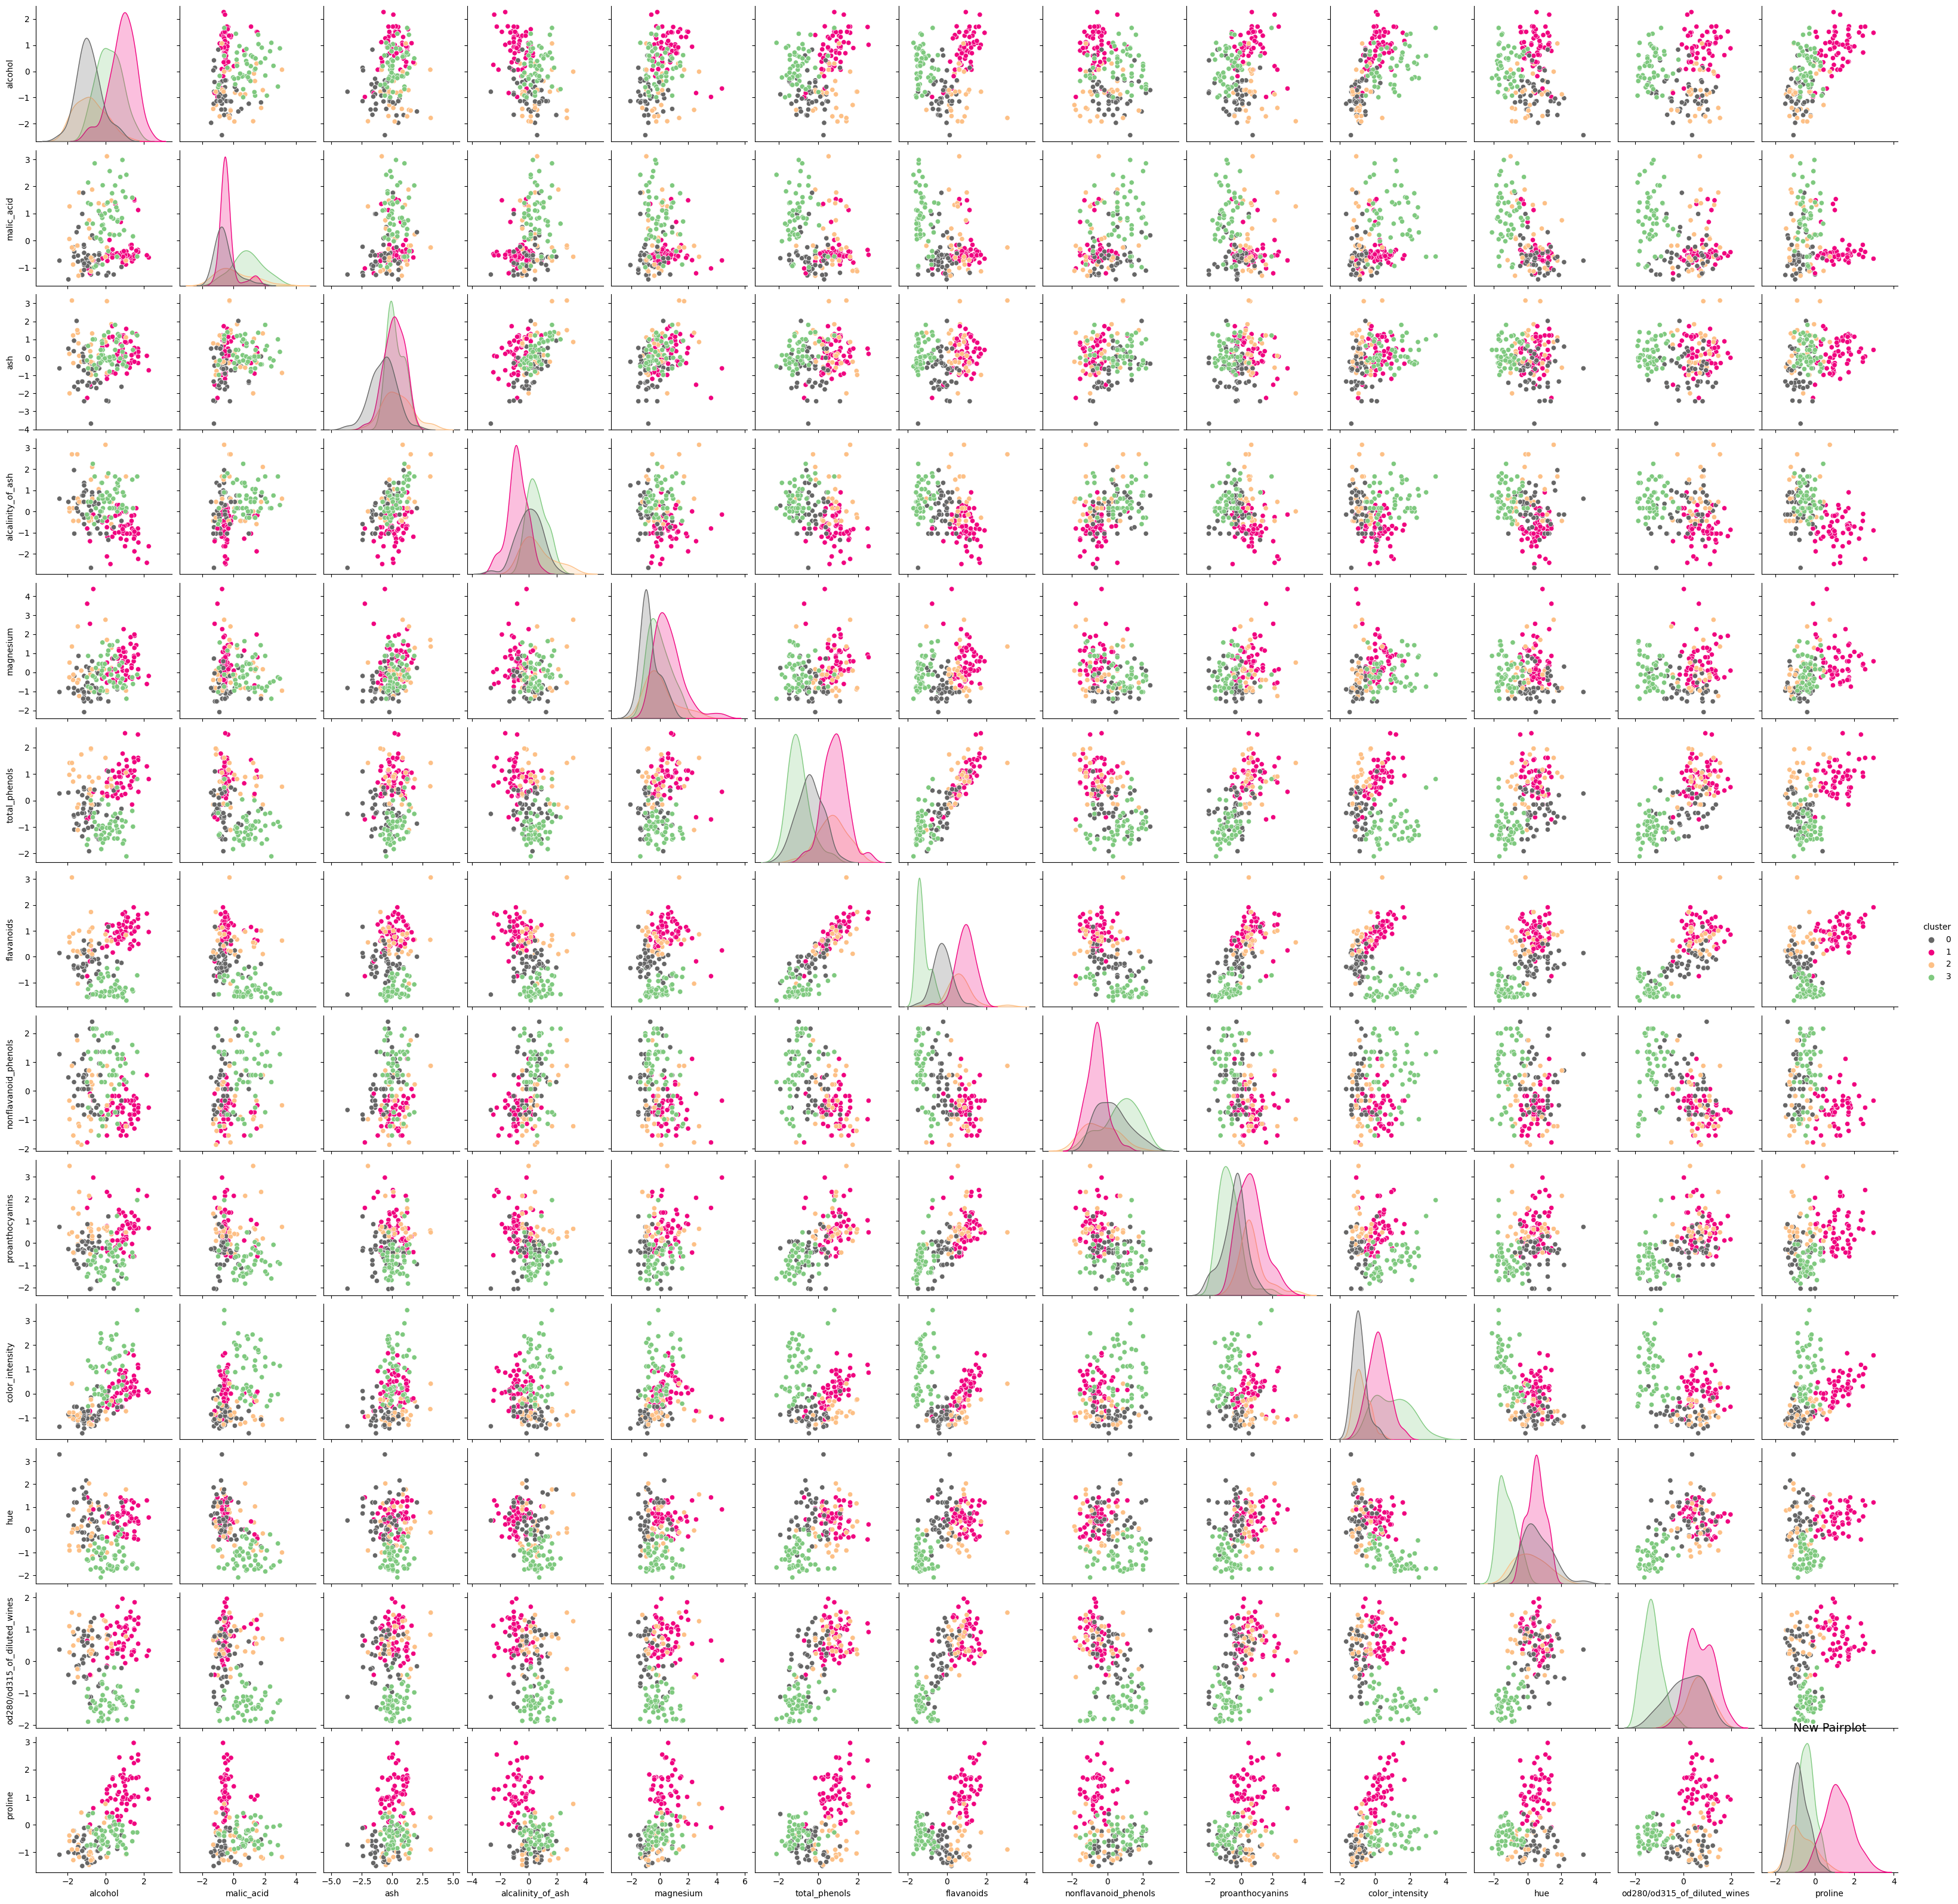

In [25]:
sns.pairplot(data=scaler_dataframe, hue="cluster", palette="Accent_r")
plt.title("New Pairplot", fontsize=14)
plt.show()

In [33]:
#Andiamo a cercare quale k è il migliore( lo facciamo a mano ma kmeans++ lo fa da solo)
k_to_test = range(2, 25, 1)
#Maggiore è l'indice di silhoutte maggiore è la clusterizzazione
silhouette_scores = {}
new_dataset = scaler_dataframe.drop('cluster', axis=1)

#lista k che voglio testare , creo un nuovo modello per ognuno di questi, 
for k in k_to_test:
    model_kmeans = KMeans(n_clusters=k)
    model_kmeans.fit(new_dataset)
    labels_k = model_kmeans.labels_
    score_k = metrics.silhouette_score(new_dataset, labels_k)
    silhouette_scores[k] = score_k
    print('Tested kmeans with k=%d\tSS: %5.4f'%(k, score_k))

C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

Tested kmeans with k=2	SS: 0.2593
Tested kmeans with k=3	SS: 0.2849
Tested kmeans with k=4	SS: 0.2584
Tested kmeans with k=5	SS: 0.2127


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=6	SS: 0.1623
Tested kmeans with k=7	SS: 0.1534
Tested kmeans with k=8	SS: 0.1326


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=9	SS: 0.1406
Tested kmeans with k=10	SS: 0.1351
Tested kmeans with k=11	SS: 0.1388


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=12	SS: 0.1457
Tested kmeans with k=13	SS: 0.1357


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=14	SS: 0.1403
Tested kmeans with k=15	SS: 0.1355


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=16	SS: 0.1268
Tested kmeans with k=17	SS: 0.1402


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=18	SS: 0.1254
Tested kmeans with k=19	SS: 0.1457


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=20	SS: 0.1535
Tested kmeans with k=21	SS: 0.1356


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=22	SS: 0.1363
Tested kmeans with k=23	SS: 0.1283


C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC DI VINCI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kmeans with k=24	SS: 0.1361


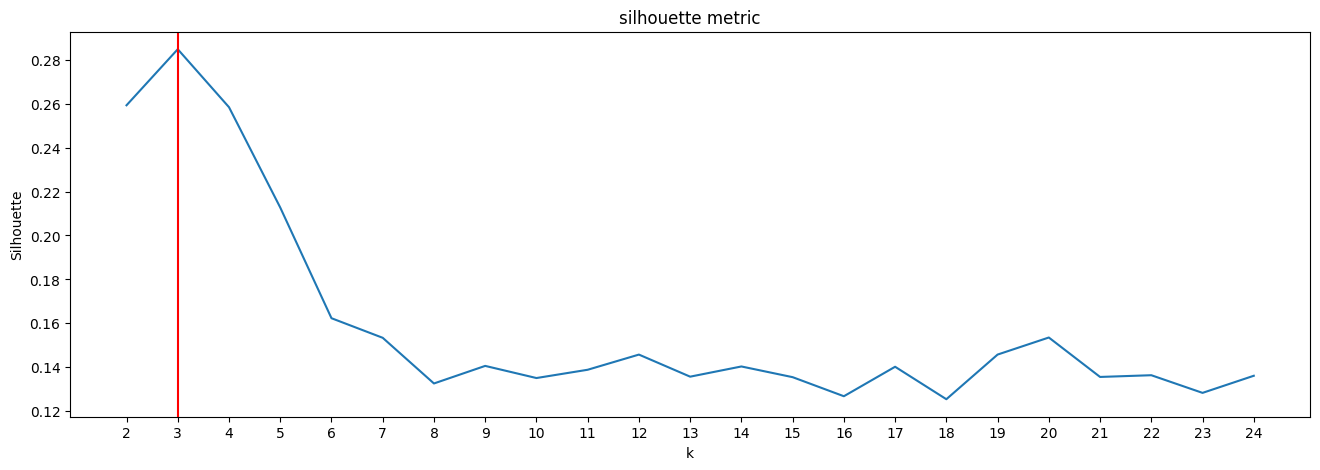

In [38]:
plt.figure(figsize=(16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,23,1),silhouette_scores.keys())
plt.title("silhouette metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1,color="r")
plt.show()

In [ ]:
#Ricalcolare i cluster col k migliore

new_dataset['cluster'] = kmeans_model.labels_
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaler_dataframe)
centroid = kmeans_model.cluster_centers_
print('\ncentroids\n', centroids)
print('\nshape\n', kmeans_model.cluster_centers_.shape)
print('\nlabel\n', kemans_model.labels_)